In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pylab as plt
from mceq2d_dists import MCEQDist2D, CalcMCEqHists

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
mceq_sol = MCEQDist2D(
                 energy = 100,
                 pdg_id = 2212,
                 theta_deg = 30,
                 slant_depths = [143, 647, 1033],
                 energy_range = [1e-1, 1e4],
                 interaction_model = "EPOS-LHC", 
                 hybrid_crossover = 0.1,
                 density_model = ("CORSIKA", ("USStd", None)))

MCEqRun::set_interaction_model(): EPOSLHC
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)


100%|██████████| 2559/2559 [00:19<00:00, 132.90it/s]


In [9]:
mceq_dists = CalcMCEqHists(mceq_sol, particles = [12, 13, 14])

  0%|          | 0/3 [00:00<?, ?it/s]

Inverse hankel transform for (-12, 0) and depths [143, 647, 1033]


Inverse hankel transform for (12, 0) and depths [143, 647, 1033]


 33%|███▎      | 1/3 [00:30<01:01, 30.60s/it]

Inverse hankel transform for (-13, 0) and depths [143, 647, 1033]


Inverse hankel transform for (-13, -1) and depths [143, 647, 1033]


Inverse hankel transform for (-13, 1) and depths [143, 647, 1033]


Inverse hankel transform for (13, 0) and depths [143, 647, 1033]


Inverse hankel transform for (13, -1) and depths [143, 647, 1033]


Inverse hankel transform for (13, 1) and depths [143, 647, 1033]


 67%|██████▋   | 2/3 [02:02<01:06, 66.49s/it]

Inverse hankel transform for (-14, 0) and depths [143, 647, 1033]


Inverse hankel transform for (14, 0) and depths [143, 647, 1033]


100%|██████████| 3/3 [02:32<00:00, 50.80s/it]


In [11]:
angle_bins = mceq_dists.default_angbins
energy_bins = [1, 1.3, 2, 2.5, 4, 5]
mceq_hists = mceq_dists.histograms(energy_bins, angle_bins)

  0%|          | 0/3 [00:00<?, ?it/s]

Particle 12, slant depth = 143
Particle 12, slant depth = 647
Particle 12, slant depth = 1033


 33%|███▎      | 1/3 [00:02<00:05,  2.81s/it]

Particle 13, slant depth = 143
Particle 13, slant depth = 647
Particle 13, slant depth = 1033


 67%|██████▋   | 2/3 [00:04<00:02,  2.32s/it]

Particle 14, slant depth = 143
Particle 14, slant depth = 647
Particle 14, slant depth = 1033


100%|██████████| 3/3 [00:07<00:00,  2.46s/it]


In [54]:
from pathlib import Path
import sys
scripts_dir = Path("/hetghome/antonpr/xmax_sigma/flincpy/scripts")
sys.path.insert(0, str(scripts_dir/"fluka_comparison"))
# sys.path.insert(0, str(scripts_dir/"corsika_comparison"))

from fluka_muon_data import (fluka_dists, 
                             fluka_data, 
                             fluka_original_dists,
                             fluka_en_data,
                             merge_bins)

from read_fluka_data import fluka_histogram

In [64]:
fluka_hist = {}
for label in ("current", "develop"):
    fluka_hist[label] = fluka_histogram(label, 3)
    
fluka_ang_bins = fluka_hist["current"][0][0][0]   

In [13]:
fl_labels = ["old", "devel", "current"]
fl_data = {}

for fl_label in fl_labels:
    fl_data[fl_label] = fluka_data(fl_label)


In [30]:
bin_merge_level = 3

fluka_en_hists = {}
en_dists = {}
ang_dists = {}

for key, fl_datum in fl_data.items():
    res = fluka_original_dists(fl_datum, binmerging_level=bin_merge_level)
    fluka_en_hists[key] = res[0]
    en_dists[key] = res[1]
    ang_dists[key] = res[2]


current_data = "current"
fluka_en_hist = fluka_en_hists[current_data]
fluka_en_dist = en_dists[current_data]
fluka_ang_dist = ang_dists[current_data]

In [27]:
print(mceq_dists.default_ebins[11:13])
print(mceq_dists.default_ebins[14:16])
print(mceq_dists.default_ebins[17:19])

[1.         1.25892541]
[1.99526231 2.51188643]
[3.98107171 5.01187234]


In [87]:
angle_bins = fluka_ang_bins
# energy_bins = [1, 1.25892541, 1.99526231,  2.51188643,  3.98107171, 5.01187234]
#energy_bins = mceq_dists.default_ebins # [1, 1.3, 2, 2.5, 4, 5]
energy_bins = [1, 1.3, 2, 2.5, 4, 5]
mceq_hists = mceq_dists.histograms(energy_bins, angle_bins)

  0%|          | 0/3 [00:00<?, ?it/s]

Particle 12, slant depth = 143
Particle 12, slant depth = 647
Particle 12, slant depth = 1033


 33%|███▎      | 1/3 [00:00<00:01,  1.22it/s]

Particle 13, slant depth = 143
Particle 13, slant depth = 647


 67%|██████▋   | 2/3 [00:01<00:00,  1.54it/s]

Particle 13, slant depth = 1033
Particle 14, slant depth = 143
Particle 14, slant depth = 647
Particle 14, slant depth = 1033


100%|██████████| 3/3 [00:02<00:00,  1.34it/s]


In [89]:
energy_bins = [1, 1.25892541, 1.99526231,  2.51188643,  3.98107171, 5.01187234]
mceq_hists_mb = mceq_dists.histograms(energy_bins, angle_bins)

  0%|          | 0/3 [00:00<?, ?it/s]

Particle 12, slant depth = 143
Particle 12, slant depth = 647
Particle 12, slant depth = 1033


 33%|███▎      | 1/3 [00:00<00:01,  1.25it/s]

Particle 13, slant depth = 143
Particle 13, slant depth = 647


 67%|██████▋   | 2/3 [00:01<00:00,  1.53it/s]

Particle 13, slant depth = 1033
Particle 14, slant depth = 143
Particle 14, slant depth = 647
Particle 14, slant depth = 1033


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


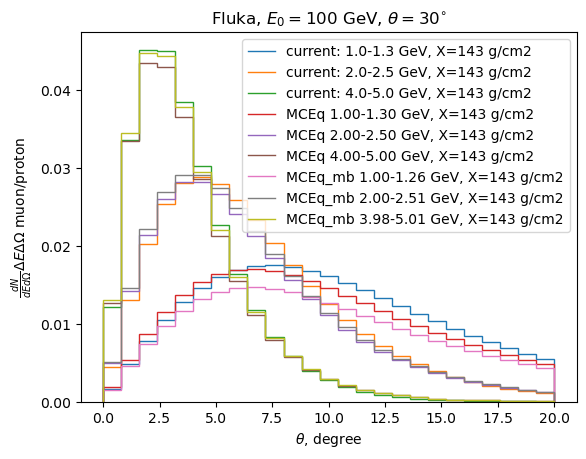

In [92]:

for ixdepth in range(3):
    for ienergy in range(3):
        if (ienergy in [0, 1, 2]) and (ixdepth in [0]):
            fl_dist = fluka_hist["current"][ixdepth][ienergy]
            line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
                    label = f"current: {fl_dist[4]} GeV, X={fl_dist[3]} g/cm2")

            # fl_dist = fluka_hist["develop"][ixdepth][ienergy]
            # plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
            #         label = f"develop: {fl_dist[4]} GeV, X={fl_dist[3]} g/cm2",
            #         color = line.get_edgecolor(),
            #         linestyle = "--")

# ixdepths = [2]
# for ixdepth in range(3):
#     if ixdepth in ixdepths: # Choose xdepths to plot
#         for i, ang_dist in enumerate(fluka_ang_dist[ixdepth]):
#             if i in [0]: # Choose energy ranges to plot
#                 plt.stairs(ang_dist[0], np.rad2deg(ang_dist[1]), label = f"{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")

xdepth = 143
for ind_energy, en1 in enumerate(mceq_hists[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.2f}-{en_range[1]:0.2f}"
        plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV, X={xdepth} g/cm2")
        
        
for ind_energy, en1 in enumerate(mceq_hists[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_mb[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.2f}-{en_range[1]:0.2f}"
        plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq_mb {en_label} GeV, X={xdepth} g/cm2")        

plt.title(r"Fluka, $E_{0}=100$ GeV, $\theta=30^{\circ}$")
plt.xlabel(r"$\theta$, degree")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ muon/proton")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend()

In [62]:
import sys
sys.path.append("/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy")
print(sys.path)
from corsika_comparison import (corsika_hist, combined_data, 
                                 corsika_en_theta_2dhist,
                                 combined_ang_data)

['/hetghome/antonpr/xmax_sigma/flincpy/scripts/fluka_comparison', '/hetghome/antonpr/xmax_sigma/flincpy', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python39.zip', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python3.9', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python3.9/lib-dynload', '', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python3.9/site-packages', '/hetghome/antonpr/chromo/src', '/hetghome/antonpr/MCEq', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy']


In [70]:
# corsika_en_hist = corsika_en_theta_2dhist(fluka_en_hists1[0][1], 
#                                           ang_dists1[0][0][1],
#                                           h5file="04_corsika_data/corsika_leptons_02.h5")

corsika_en_hist = corsika_en_theta_2dhist(fluka_en_hist[0][1], 
                                          fluka_ang_dist[0][0][1],
                                          h5file="01_corsika_data/corsika_01.h5")

# corsika_en_hist = corsika_en_theta_2dhist(fluka_en_hist[0][1], 
#                                           fluka_ang_dist[0][0][1],
#                                           h5file="05_corsika_data/corsika_05.h5")

# corsika_en_hist = corsika_en_theta_2dhist(fluka_en_hist[0][1], 
#                                           fluka_ang_dist[0][0][1],
#                                           h5file="05_corsika_data/corsika_3e6.h5")
# corsika_en_hist = corsika_en_theta_2dhist(fluka_en_hists1[0][1], 
#                                           ang_dists1[0][0][1],
#                                           h5file="corsika_leptons.h5")
corsika_comb_hist = combined_ang_data(corsika_en_hist, (-13, 13))

pdg = -12
xdepth=65.0, number=1.1183e+06
xdepth=143.0, number=2.6772e+06
xdepth=638.0, number=3.0698e+06
xdepth=1195.0, number=3.0807e+06
pdg = 12
xdepth=65.0, number=1.2068e+06
xdepth=143.0, number=2.8787e+06
xdepth=638.0, number=3.3082e+06
xdepth=1195.0, number=3.3204e+06
pdg = -13
xdepth=65.0, number=2.7328e+06
xdepth=143.0, number=2.4914e+06
xdepth=638.0, number=1.3489e+06
xdepth=1195.0, number=1.3143e+06
pdg = 13
xdepth=65.0, number=2.4792e+06
xdepth=143.0, number=2.2358e+06
xdepth=638.0, number=1.1539e+06
xdepth=1195.0, number=1.1219e+06
pdg = -14
xdepth=65.0, number=3.8881e+06
xdepth=143.0, number=7.4964e+06
xdepth=638.0, number=7.9958e+06
xdepth=1195.0, number=8.0084e+06
pdg = 14
xdepth=65.0, number=4.1448e+06
xdepth=143.0, number=7.8193e+06
xdepth=638.0, number=8.2841e+06
xdepth=1195.0, number=8.2954e+06


Tot sum = 0.10782388973710218, corsika:[1.0, 1.3] GeV, X=1195.0 g/cm2
Tot sum = 0.14103938366759255, corsika:[2.0, 2.5] GeV, X=1195.0 g/cm2
Tot sum = 0.16138089496629537, corsika:[4.0, 5.0] GeV, X=1195.0 g/cm2
Tot sum = 0.10896309722773191, fluka:[1.  1.3] GeV, X=1033.0 g/cm2
Tot sum = 0.1390150283372564, fluka:[2.  2.5] GeV, X=1033.0 g/cm2
Tot sum = 0.15959941870466707, fluka:[4. 5.] GeV, X=1033.0 g/cm2


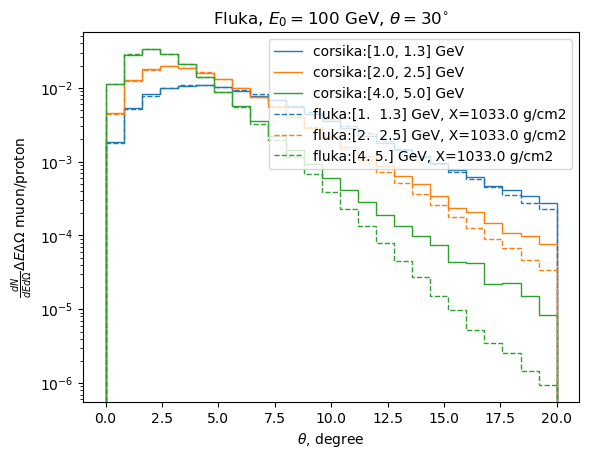

In [71]:
ixlist = [2]

ixdepth = 2
linecolor = []
# for ixdepth in range(3):
    # if ixdepth in ixlist: # Choose xdepths to plot
for i, ang_dist in enumerate(corsika_comb_hist[ixdepth+1]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(ang_dist[0], np.rad2deg(ang_dist[1]), label = f"corsika:{ang_dist[2]} GeV")
        linecolor.append(line.get_edgecolor())
        print(f"Tot sum = {np.sum(ang_dist[0])}, corsika:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")

icolor = 0                
# for ixdepth in range(3):
#     if ixdepth in ixlist: # Choose xdepths to plot
for i, ang_dist in enumerate(fluka_ang_dist[ixdepth]):
    if i in [0, 1, 2]: # Choose energy ranges to plot
        plt.stairs(ang_dist[0], np.rad2deg(ang_dist[1]),
                    color=linecolor[icolor],
                    linestyle = "--", 
                    label = f"fluka:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")
        icolor += 1
        print(f"Tot sum = {np.sum(ang_dist[0])}, fluka:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")



plt.title(r"Fluka, $E_{0}=100$ GeV, $\theta=30^{\circ}$")
plt.xlabel(r"$\theta$, degree")
plt.yscale("log")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ muon/proton")
plt.legend()

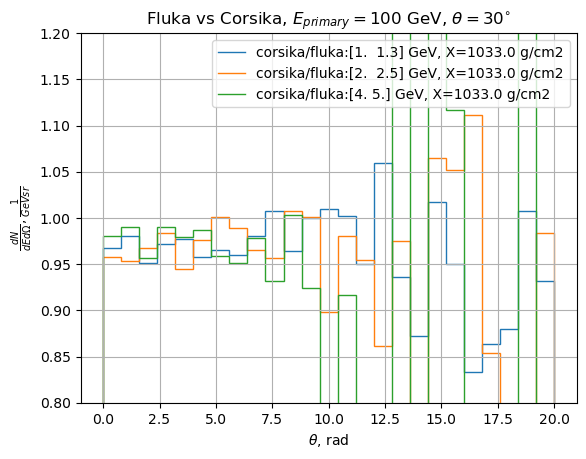

In [69]:
ixdepth = 2
# for ixdepth in range(3):
#     if ixdepth in ixlist: # Choose xdepths to plot        
en_list = [0, 2, 4]    
for i in range(3):
    ang_dist = corsika_comb_hist[ixdepth + 1][en_list[i]]
    plot_dist_cors = ang_dist[0]
    
    ang_dist = fluka_ang_dist[ixdepth][i]
    plot_dist_fluk = ang_dist[0]

    # plt.stairs(plot_dist_fluk, ang_dist[1], label = f"fluka:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")
    # plt.stairs(plot_dist_cors, ang_dist[1], label = f"corsika:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")
    plt.stairs(plot_dist_cors/plot_dist_fluk, np.rad2deg(ang_dist[1]), label = f"corsika/fluka:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2") 
    # plt.stairs((np.cos((ang_dist[1][:-1] + ang_dist[1][1:])/2)**2), ang_dist[1], label = f"fluka:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2") 
    # print(plot_dist_fluk/plot_dist_cors, f"fluka/corsika:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")


plt.title(r"Fluka vs Corsika, $E_{primary}=100$ GeV, $\theta=30^{\circ}$")
plt.xlabel(r"$\theta$, rad")
# plt.ylabel(r"fluka/corsika of $\frac{dN}{dEd\Omega}, \frac{1}{GeV sr}$")
plt.ylabel(r"$\frac{dN}{dEd\Omega}, \frac{1}{GeV sr}$")
plt.ylim(0.8,1.2)
plt.legend()
plt.grid()

In [43]:
fluka_en_spec_dev = fluka_en_data("develop_version")
fluka_en_spec_cur = fluka_en_data("current_version")

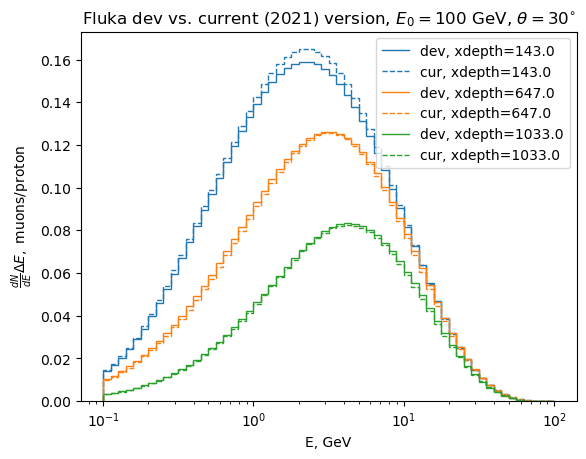

In [44]:
for i, spec_data in enumerate(fluka_en_spec_dev):
    spec_data = fluka_en_spec_dev[i]
    line = plt.stairs(spec_data[1], spec_data[0], label = f"dev, xdepth={spec_data[3]}")
    spec_data = fluka_en_spec_cur[i]
    plt.stairs(spec_data[1], spec_data[0],
               color = line.get_edgecolor(),
               linestyle = "--", 
               label = f"cur, xdepth={spec_data[3]}")  

plt.title(r"Fluka dev vs. current (2021) version, $E_{0}=100$ GeV, $\theta=30^{\circ}$")   
plt.xscale("log")
plt.xlabel("E, GeV")
plt.ylabel(r"$\frac{dN}{dE}\Delta E,$ muons/proton")
# plt.yscale("log")
plt.legend() 

In [45]:
import sys
sys.path.append("/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy")
print(sys.path)

['/hetghome/antonpr/xmax_sigma/flincpy/scripts/fluka_comparison', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/fluka_comparison', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/fluka_comparison', '/hetghome/antonpr/xmax_sigma/flincpy', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python39.zip', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python3.9', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python3.9/lib-dynload', '', '/hetghome/antonpr/miniconda3/envs/env_impy/lib/python3.9/site-packages', '/hetghome/antonpr/chromo/src', '/hetghome/antonpr/MCEq', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy', '/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy']


In [46]:

from corsika_comparison import (corsika_hist, combined_data, 
                                corsika_en_theta_2dhist)

In [47]:

energy_bins = mceq_dist.e_bins

en_hist = corsika_hist(en_bins = energy_bins)
en_hist_tanya = corsika_hist(en_bins = energy_bins, 
                            h5file="corsika_leptons.h5")

en_hist3 = corsika_hist(en_bins = energy_bins,
                        h5file="04_corsika_data/corsika_leptons_02.h5")

en_hist4 = corsika_hist(en_bins = energy_bins,
                        h5file="03_corsika_data/corsika_100GeV_30deg.h5")

NameError: name 'mceq_dist' is not defined

/tmp/ipykernel_1267941/1594495603.py:8: RuntimeWarning: invalid value encountered in divide
  plt.stairs(cdata[0]/cdata1[0], cdata[1], label = f"Corsika_yesterday {cdata[2]}")


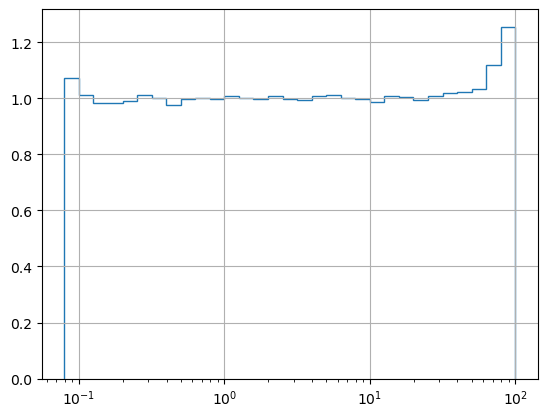

In [ ]:

pdg = 13
xdepth = 3
cdata = combined_data(en_hist3, (-pdg, pdg), xdepth)
cdata1 = combined_data(en_hist3, (-pdg, pdg), xdepth)
# plt.stairs(*cdata[0:2], label = f"Corsika_new {cdata[2]}")

cdata = combined_data(en_hist4, (-pdg, pdg), xdepth)
plt.stairs(cdata[0]/cdata1[0], cdata[1], label = f"Corsika_yesterday {cdata[2]}")

plt.xscale("log")
plt.grid()

In [ ]:
fluka_red_bins = merge_bins(fluka_en_spec_dev[2][1], fluka_en_spec_dev[2][0])

In [ ]:
fluka_red_bins[1]

array([  0.1      ,   0.1258925,   0.1584893,   0.1995262,   0.2511887,
         0.3162278,   0.3981072,   0.5011873,   0.6309574,   0.7943283,
         1.       ,   1.258925 ,   1.584893 ,   1.995263 ,   2.511887 ,
         3.162278 ,   3.981072 ,   5.011873 ,   6.309574 ,   7.943283 ,
        10.       ,  12.58926  ,  15.84893  ,  19.95263  ,  25.11887  ,
        31.62278  ,  39.81072  ,  50.11873  ,  63.09574  ,  79.43283  ,
       100.       ])

In [ ]:
# mceq_dist.flux["mu"]
mceq_dist.e_bins[1:32]

array([  0.1       ,   0.12589254,   0.15848932,   0.19952623,
         0.25118864,   0.31622777,   0.39810717,   0.50118723,
         0.63095734,   0.79432823,   1.        ,   1.25892541,
         1.58489319,   1.99526231,   2.51188643,   3.16227766,
         3.98107171,   5.01187234,   6.30957344,   7.94328235,
        10.        ,  12.58925412,  15.84893192,  19.95262315,
        25.11886432,  31.6227766 ,  39.81071706,  50.11872336,
        63.09573445,  79.43282347, 100.        ])

In [ ]:
# fluka_en_spec_dev[0][1]*(fluka_en_spec_dev[0][0][1:] - fluka_en_spec_dev[0][0][0:-1])

In [ ]:
fluka_red_bins[0]/mceq_dist.flux["mu"][1:31]

array([1.07567631, 1.09223836, 1.10431679, 1.10901674, 1.10218757,
       1.0914634 , 1.07731593, 1.06261502, 1.04799399, 1.03479909,
       1.026952  , 1.02250259, 1.02288478, 1.02448593, 1.02797035,
       1.03038166, 1.03381072, 1.04014286, 1.04391708, 1.05004418,
       1.05893343, 1.06642839, 1.06846183, 1.06235005, 1.04350519,
       0.9984376 , 0.90986021, 0.74146427, 0.49393863, 1.15498847])

In [ ]:
first_negative = np.where(mceq_dist.flux["mu"] < 0)[0][0]
mceq_dist.flux["mu"][:first_negative]
mceq_dist.flux["mu"]
# len(mceq_dist.flux["mu"][:first_negative])

array([ 4.92583851e-03,  6.75013460e-03,  9.18207895e-03,  1.24211974e-02,
        1.66815643e-02,  2.22501836e-02,  2.94076103e-02,  3.84015415e-02,
        4.94570923e-02,  6.26153934e-02,  7.76515718e-02,  9.40093621e-02,
        1.10850959e-01,  1.26959995e-01,  1.41237483e-01,  1.52440477e-01,
        1.59418596e-01,  1.60930585e-01,  1.56207117e-01,  1.45444685e-01,
        1.29497084e-01,  1.09425522e-01,  8.72828900e-02,  6.51366716e-02,
        4.48520736e-02,  2.80217606e-02,  1.54919704e-02,  7.22242403e-03,
        2.54721208e-03,  5.35741278e-04,  7.27782574e-06, -1.67354641e-05,
        1.37262903e-06, -1.81002950e-07,  7.93172022e-09, -5.25264000e-10,
        1.52859617e-11, -6.50889431e-13,  1.36131914e-14, -4.17108174e-16,
        6.62691636e-18, -1.57080305e-19,  1.98619943e-21, -3.85250941e-23,
        4.03949314e-25, -6.71631395e-27,  6.05701992e-29, -8.92810158e-31,
        5.88164071e-31, -1.30479612e-32,  2.40495437e-33])

In [ ]:
mceq_dist.e_bins[0:first_negative+1]

array([7.94328235e-02, 1.00000000e-01, 1.25892541e-01, 1.58489319e-01,
       1.99526231e-01, 2.51188643e-01, 3.16227766e-01, 3.98107171e-01,
       5.01187234e-01, 6.30957344e-01, 7.94328235e-01, 1.00000000e+00,
       1.25892541e+00, 1.58489319e+00, 1.99526231e+00, 2.51188643e+00,
       3.16227766e+00, 3.98107171e+00, 5.01187234e+00, 6.30957344e+00,
       7.94328235e+00, 1.00000000e+01, 1.25892541e+01, 1.58489319e+01,
       1.99526231e+01, 2.51188643e+01, 3.16227766e+01, 3.98107171e+01,
       5.01187234e+01, 6.30957344e+01, 7.94328235e+01, 1.00000000e+02])

In [ ]:
mceq_dist.flux["mu"][1:31]

array([6.75013460e-03, 9.18207895e-03, 1.24211974e-02, 1.66815643e-02,
       2.22501836e-02, 2.94076103e-02, 3.84015415e-02, 4.94570923e-02,
       6.26153934e-02, 7.76515718e-02, 9.40093621e-02, 1.10850959e-01,
       1.26959995e-01, 1.41237483e-01, 1.52440477e-01, 1.59418596e-01,
       1.60930585e-01, 1.56207117e-01, 1.45444685e-01, 1.29497084e-01,
       1.09425522e-01, 8.72828900e-02, 6.51366716e-02, 4.48520736e-02,
       2.80217606e-02, 1.54919704e-02, 7.22242403e-03, 2.54721208e-03,
       5.35741278e-04, 7.27782574e-06])

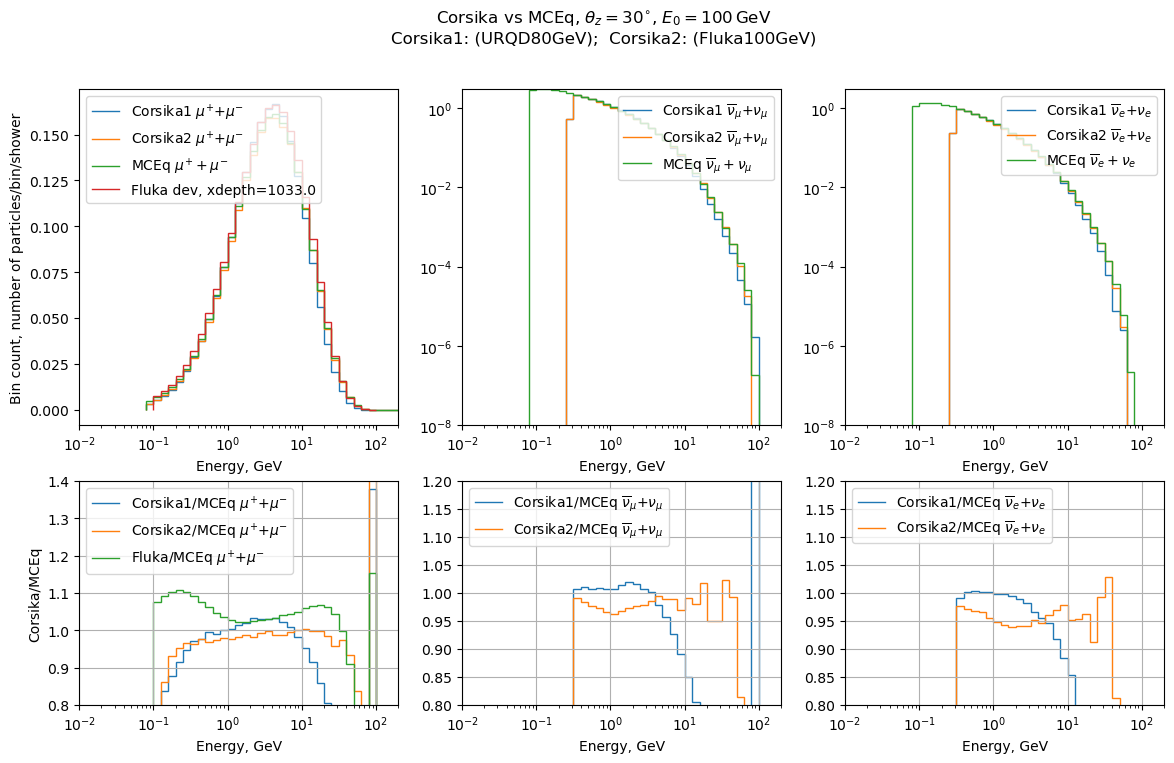

In [ ]:

figure = plt.figure(figsize=(14, 8))
grid_spec = figure.add_gridspec(nrows=2, ncols=3, width_ratios=[1, 1, 1], height_ratios=[3, 2])


# plt.figure(figsize=(6, 8))
# fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios =[1, 1])
# fig.set_figure(figsize=(6, 8))
# ax1 = gs[0, 0]
# ax2 = gs[0, 1]
# fig.suptitle('Horizontally stacked subplots')

axis = []

for i in range(2):
    axis_row = []
    for j in range(3):
        axis_row.append(figure.add_subplot(grid_spec[i, j]))
    axis.append(axis_row)

# plt.title(r"Muons: Corsika vs MCEq, $\theta_{z} = 30^{\circ}$, $E_{0} = 100\,$GeV ")
figure.suptitle(r"Corsika vs MCEq, $\theta_{z} = 30^{\circ}$, $E_{0} = 100\,$GeV" + "\n" + 
                "Corsika1: (URQD80GeV);  Corsika2: (Fluka100GeV)")
ax = axis[0][0]
cdata = combined_data(en_hist_tanya, (-13, 13), 3)
ax.stairs(*cdata[0:2], label = f"Corsika1 {cdata[2]}")

# cdata = combined_data(en_hist, (-13, 13), 3)
# plt.stairs(*cdata[0:2], label = f"corsika {cdata[2]}")

cdata = combined_data(en_hist3, (-13, 13), 3)
ax.stairs(*cdata[0:2], label = f"Corsika2 {cdata[2]}")

# plt.stairs(mceq_loss.flux["mu"], mceq_loss.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq", linestyle='--')


mceq_dist.flux["mu"]
ax.stairs(mceq_dist.flux["mu"], mceq_dist.e_bins, 
           label = r"MCEq ${\mu}^{+} + {\mu}^{-}$", linestyle='-')

spec_data = fluka_en_spec_dev[2]
ax.stairs(*fluka_red_bins, label = f"Fluka dev, xdepth={spec_data[3]}")

ax.set_xlabel("Energy, GeV")
ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_ylabel("Bin count, number of particles/bin/shower")
ax.set_xlim(1e-2, 2e2)
# ax.set_ylim(1e-8, 1)
ax.legend(loc = "upper left")

# ---------------- Neutrino---------------------

ax = axis[0][1]
cdata = combined_data(en_hist_tanya, (-14, 14), 3)
ax.stairs(*cdata[0:2], label = f"Corsika1 {cdata[2]}")

cdata = combined_data(en_hist3, (-14, 14), 3)
ax.stairs(*cdata[0:2], label = f"Corsika2 {cdata[2]}")

ax.stairs(mceq_dist.flux["numu"], mceq_dist.e_bins, 
           label = r"MCEq $\overline{\nu}_{\mu} + {\nu}_{\mu}$", linestyle='-')

ax.set_xlabel("Energy, GeV")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-2, 2e2)
ax.set_ylim(1e-8, 3)
ax.legend()

# ---------------- Neutrino---------------------
ax = axis[0][2]
cdata = combined_data(en_hist_tanya, (-12, 12), 3)
ax.stairs(*cdata[0:2], label = f"Corsika1 {cdata[2]}")

cdata = combined_data(en_hist3, (-12, 12), 3)
ax.stairs(*cdata[0:2], label = f"Corsika2 {cdata[2]}")

ax.stairs(mceq_dist.flux["nue"], mceq_dist.e_bins, 
           label = r"MCEq $\overline{\nu}_{e} + {\nu}_{e}$", linestyle='-')

ax.set_xlabel("Energy, GeV")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-2, 2e2)
ax.set_ylim(1e-8, 3)
ax.legend()

# ----- Ratios

ax = axis[1][0]
cdata = combined_data(en_hist_tanya, (-13, 13), 3)
ax.stairs(cdata[0]/mceq_dist.flux["mu"], cdata[1], label = f"Corsika1/MCEq {cdata[2]}")

cdata = combined_data(en_hist3, (-13, 13), 3)
ax.stairs(cdata[0]/mceq_dist.flux["mu"], cdata[1], label = f"Corsika2/MCEq {cdata[2]}")

ax.stairs(fluka_red_bins[0]/mceq_dist.flux["mu"][1:31], cdata[1][1:32], label = f"Fluka/MCEq {cdata[2]}")

ax.set_xlabel("Energy, GeV")
ax.set_xscale("log")
ax.set_ylabel("Corsika/MCEq")
# plt.yscale("log")
ax.set_xlim(1e-2, 2e2)
ax.set_ylim(0.8, 1.4)
ax.grid()
ax.legend(loc = "upper left")
# ax.set_grid()
# ax.xscale("log")


ax = axis[1][1]
cdata = combined_data(en_hist_tanya, (-14, 14), 3)
ax.stairs(cdata[0]/mceq_dist.flux["numu"], cdata[1], label = f"Corsika1/MCEq {cdata[2]}")

cdata = combined_data(en_hist3, (-14, 14), 3)
ax.stairs(cdata[0]/mceq_dist.flux["numu"], cdata[1], label = f"Corsika2/MCEq {cdata[2]}")

ax.set_xlabel("Energy, GeV")
ax.set_xscale("log")
# plt.yscale("log")
ax.set_xlim(1e-2, 2e2)
ax.set_ylim(0.8, 1.2)
ax.grid()
ax.legend(loc = "upper left")
# ax.legend()
# ax.set_grid()
# ax.xscale("log")
# # plt.yscale("log")
# ax.xlim(1e-2, 2e2)
# # plt.ylim(-0.01, 0.5)
# ax.legend()
# ax.grid()

ax = axis[1][2]
cdata = combined_data(en_hist_tanya, (-12, 12), 3)
ax.stairs(cdata[0]/mceq_dist.flux["nue"], cdata[1], label = f"Corsika1/MCEq {cdata[2]}")

cdata = combined_data(en_hist3, (-12, 12), 3)
ax.stairs(cdata[0]/mceq_dist.flux["nue"], cdata[1], label = f"Corsika2/MCEq {cdata[2]}")

ax.set_xlabel("Energy, GeV")
ax.set_xscale("log")
# plt.yscale("log")
ax.set_xlim(1e-2, 2e2)
ax.set_ylim(0.8, 1.2)
ax.grid()
ax.legend(loc = "upper left")

# plt.title(r"Muons: Corsika vs MCEq, $\theta_{z} = 30^{\circ}$, $E_{0} = 100\,$GeV ")
# plt.xlabel("Energy, GeV")
# plt.ylabel("Bin count, number of particles/bin/shower")
# # plt.ylim(0.8, 1.2)
# # plt.grid(axis ='y')
# plt.legend()

# ax1.xscale("log")
# # plt.yscale("log")
# ax1.xlim(1e-2, 2e2)
# # plt.ylim(-0.01, 0.5)

# plt.legend(loc = "upper left")
# plt.grid()

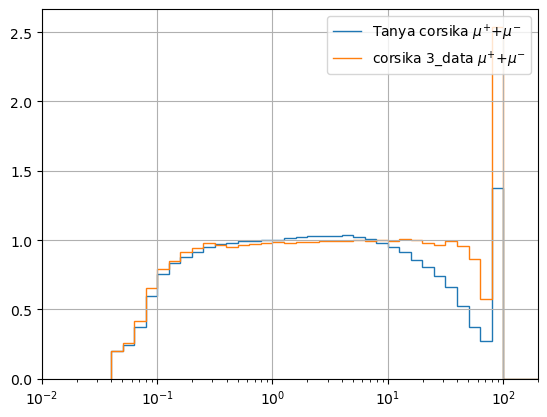

In [ ]:
cdata = combined_data(en_hist_tanya, (-13, 13), 3)
plt.stairs(cdata[0]/mceq_dist.flux["mu"], cdata[1], label = f"Tanya corsika {cdata[2]}")

cdata = combined_data(en_hist3, (-13, 13), 3)
plt.stairs(cdata[0]/mceq_dist.flux["mu"], cdata[1], label = f"corsika 3_data {cdata[2]}")

plt.xscale("log")
# plt.yscale("log")
plt.xlim(1e-2, 2e2)
# plt.ylim(-0.01, 0.5)
plt.legend()
plt.grid()

In [ ]:
bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-13, 13), bins = mceq_dist.e_bins)
plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-12, -12), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-14, 14), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

cdata = combined_data(en_hist_tanya, (-13, 13), 2)
plt.stairs(*cdata[0:2], label = f"corsika_{cdata[2]}")
# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-211, 211), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (111,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11, 11), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (11,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

plt.stairs(mceq_dist.flux["mu"], mceq_dist.e_bins, 
           label = r"${\mu}^{+} + {\mu}^{-}$ mceq", linestyle='--')
# plt.stairs(mceq_dist.flux["numu"], mceq_dist.e_bins, 
#            label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ mceq", linestyle='--')
# plt.stairs(mceq_dist.flux["nue"], mceq_dist.e_bins, 
#            label = r"$\bar{\nu}_{e} + {\nu}_{e}$ mceq", linestyle='--')
# plt.stairs(mceq_dist.flux["pi"], mceq_dist.e_bins, 
#            label = r"$\bar{\pi}^{+} + {\pi}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["el"], mceq_dist.e_bins, 
#            label = r"$\bar{e}^{+} + {e}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["e+"], mceq_dist.e_bins, 
#            label = r"${e}^{+}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["e-"], mceq_dist.e_bins, 
#            label = r"${e}^{-}$ mceq", linestyle='--')

plt.xscale("log")
# plt.yscale("log")
plt.xlim(1e-2, 2e2)
# plt.ylim(-0.01, 0.5)
plt.legend()
plt.grid()

NameError: name 'cascade_analysis' is not defined

Histogram of -13 with mass 0.1056583745
Histogram of 13 with mass 0.1056583745


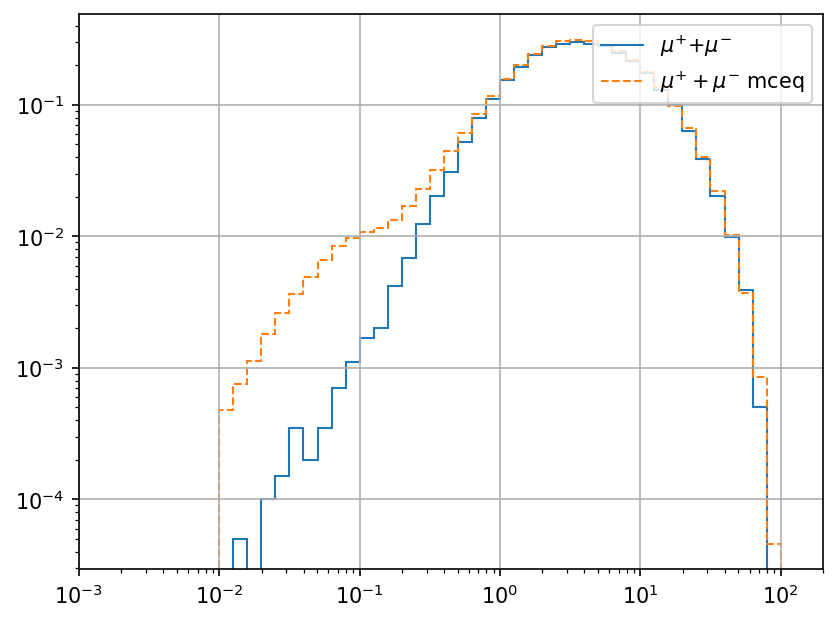

In [ ]:
plt.rcParams["figure.dpi"] = 150

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-13, 13), bins = mceq_dist.e_bins)
plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-12, -12), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-14, 14), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-211, 211), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11, 11), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (11,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

plt.stairs(mceq_dist.flux["mu"], mceq_dist.e_bins, 
           label = r"${\mu}^{+} + {\mu}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_hybrid.flux["mu"], mceq_dist.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq hb", linestyle='--')
# plt.stairs(mceq_dist.flux["numu"], mceq_dist.e_bins, 
#            label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ mceq", linestyle='--')
# plt.stairs(mceq_dist.flux["nue"], mceq_dist.e_bins, 
#            label = r"$\bar{\nu}_{e} + {\nu}_{e}$ mceq", linestyle='--')
# plt.stairs(mceq_dist.flux["pi"], mceq_dist.e_bins, 
#            label = r"$\bar{\pi}^{+} + {\pi}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["el"], mceq_dist.e_bins, 
#            label = r"$\bar{e}^{+} + {e}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["e+"], mceq_dist.e_bins, 
#            label = r"${e}^{+}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["e-"], mceq_dist.e_bins, 
#            label = r"${e}^{-}$ mceq", linestyle='--')

plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 2e2)
# plt.ylim(-0.01, 0.5)
plt.legend()
plt.grid()
# plt.savefig('temp.png', transparent=True)

Histogram of -13 with mass 0.1056583745
Histogram of 13 with mass 0.1056583745


/tmp/ipykernel_849944/659946842.py:3: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["mu"], mceq_dist.e_bins,


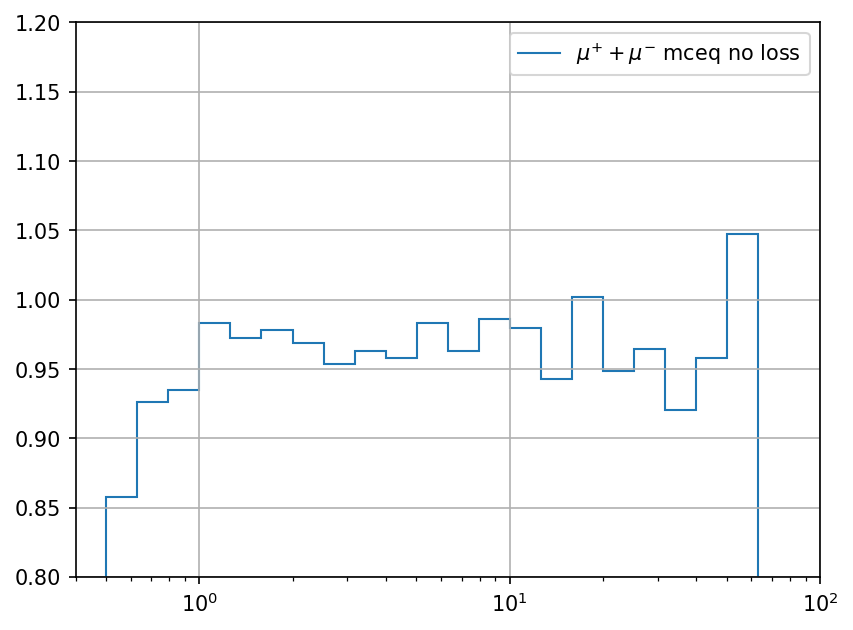

In [ ]:
bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-13, 13), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')
plt.stairs(hist/mceq_dist.flux["mu"], mceq_dist.e_bins, 
           label = r"${\mu}^{+} + {\mu}^{-}$ mceq no loss", linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-12, 12), bins = mceq_dist.e_bins)
# # plt.stairs(hist, bins, label = label, linestyle='-')
# plt.stairs(hist/mceq_dist.flux["nue"], mceq_dist.e_bins, 
#            label = r"${\nu}^{+} + {\nu}^{-}$ mceq no loss", linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-14, 14), bins = mceq_dist.e_bins)
# # plt.stairs(hist, bins, label = label, linestyle='-')
# plt.stairs(hist/mceq_dist.flux["numu"], mceq_dist.e_bins, 
#            label = r"${\nu}^{+} + {\nu}^{-}$ mceq no loss", linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11, 11), bins = mceq_dist.e_bins)
# # plt.stairs(hist, bins, label = label, linestyle='-')
# plt.stairs(hist/mceq_dist.flux["el"], mceq_dist.e_bins, 
#            label = r"${e}^{+} + {e}^{-}$ mceq no loss", linestyle='-')

# plt.stairs(mceq_loss.flux["mu"], mceq_loss.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq loss", linestyle='--')

plt.xscale("log")
plt.xlim(4e-1, 1e2)
plt.ylim(0.8, 1.2)
plt.legend()
plt.grid()

Histogram of -211 with mass 0.13957039000000002
Histogram of 211 with mass 0.13957039000000002


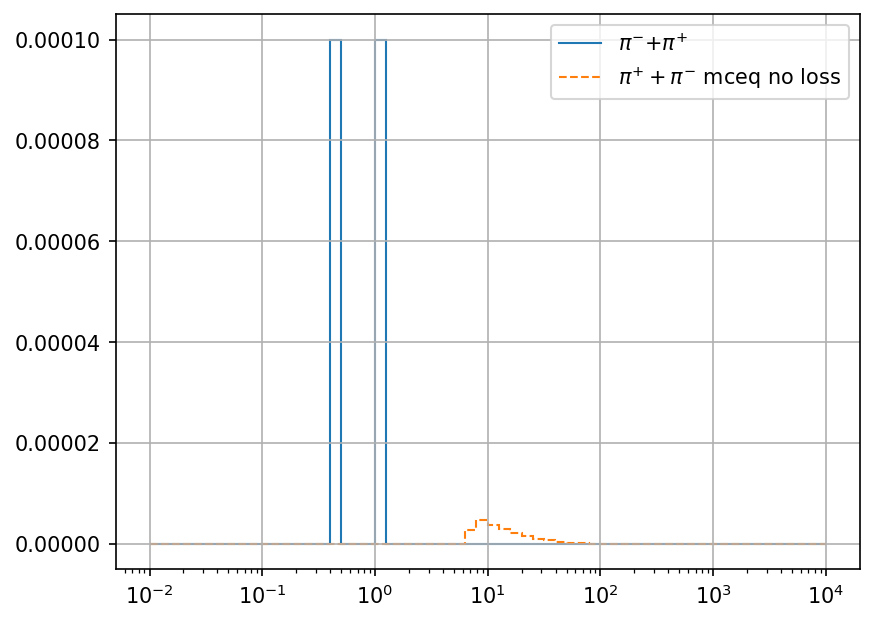

In [ ]:
bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-211, 211), bins = mceq_dist.e_bins)
plt.stairs(hist, bins, label = label, linestyle='-')


plt.stairs(mceq_dist.flux["pi"], mceq_dist.e_bins, 
           label = r"${\pi}^{+} + {\pi}^{-}$ mceq no loss", linestyle='--')

# plt.stairs(mceq_loss.flux["mu"], mceq_loss.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq loss", linestyle='--')

plt.xscale("log")
# plt.xlim(1e-2, 2e2)
# plt.ylim(-0.01, 0.5)
plt.legend()
plt.grid()

Histogram of -13 with mass 0.1056583745
Histogram of 13 with mass 0.1056583745
Histogram of -12 with mass 0.0
Histogram of 12 with mass 0.0
Histogram of -14 with mass 0.0
Histogram of 14 with mass 0.0


/tmp/ipykernel_2938205/1991008938.py:2: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["mu"], bins, label = f"{label} cas/mceq", linestyle='-')
/tmp/ipykernel_2938205/1991008938.py:5: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["nue"], bins, label = f"{label} cas/mceq", linestyle='-')
/tmp/ipykernel_2938205/1991008938.py:8: RuntimeWarning: invalid value encountered in divide
  plt.stairs(hist/mceq_dist.flux["numu"], bins, label = f"{label} cas/mceq", linestyle='-')


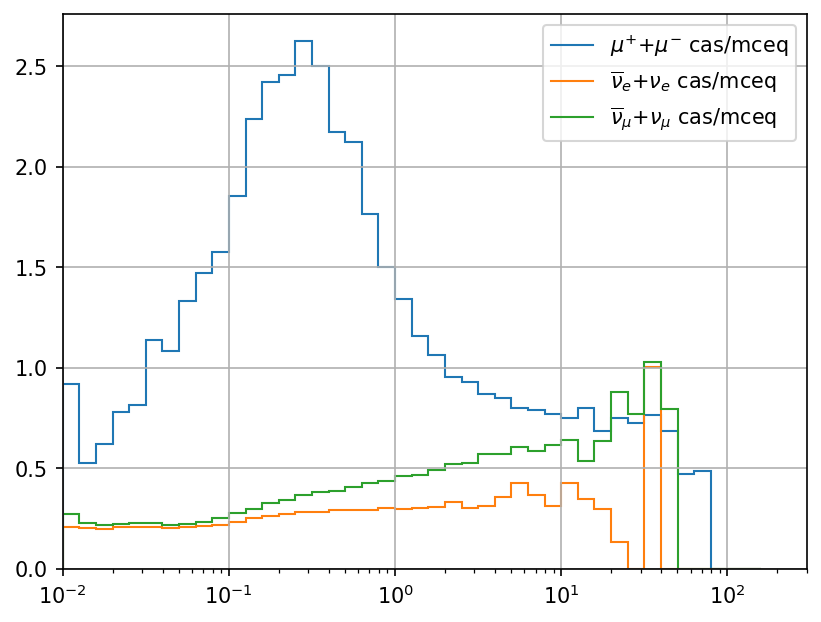

In [ ]:
bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-13, 13), bins = mceq_dist.e_bins)
plt.stairs(hist/mceq_dist.flux["mu"], bins, label = f"{label} cas/mceq", linestyle='-')

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-12, 12), bins = mceq_dist.e_bins)
plt.stairs(hist/mceq_dist.flux["nue"], bins, label = f"{label} cas/mceq", linestyle='-')

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-14, 14), bins = mceq_dist.e_bins)
plt.stairs(hist/mceq_dist.flux["numu"], bins, label = f"{label} cas/mceq", linestyle='-')


# plt.stairs(mceq_dist.flux["mu"]/1.1, mceq_dist.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq no loss", linestyle='--')

# plt.stairs(mceq_loss.flux["mu"], mceq_loss.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq loss", linestyle='--')

plt.xscale("log")
plt.xlim(1e-2, 3e2)
# plt.xlim(4e-1, 3e2)
# plt.ylim(0.8, 1.2)
plt.legend()
plt.grid()

In [ ]:
plt.plot(mceq_loss.e_grid, mceq_loss.flux["mu"], 
         label = r"${\mu}^{+} + {\mu}^{-}$ USStd", linestyle='--')

# plt.plot(mceq_loss_bk.e_grid, mceq_loss_bk.flux["mu"], 
#          label = r"${\mu}^{+} + {\mu}^{-}$ BK_USStd", linestyle='-')

plt.xscale("log")
plt.xlim(4e-1, 2e2)
plt.ylim(-0.01, 0.31)
plt.legend()
plt.savefig('temp1.png', transparent=True)

NameError: name 'mceq_loss' is not defined

In [ ]:
plt.plot(mceq_loss.e_grid, mceq_loss_bk.flux["mu"]/mceq_loss.flux["mu"], 
         label = r"${\mu}^{+} + {\mu}^{-}$ (BK_USStd/USStd)", linestyle='--')

# plt.plot(mceq_loss_bk.e_grid, mceq_loss_bk.flux["mu"], 
#          label = r"${\mu}^{+} + {\mu}^{-}$ bk", linestyle='-')

plt.xscale("log")
plt.xlim(4e-1, 2e2)
# plt.ylim(-0.01, 0.31)
plt.legend()
plt.savefig('temp.png', transparent=True)

In [ ]:
plt.plot(res_mceq.egrid, res_mceq.mu_spec[1], label = f"{res_mceq.mu_spec[2]}", linestyle='--')

plt.xscale("log")
plt.xlim(4e-1, 2e2)
plt.ylim(-0.01, 0.31)
plt.legend()
plt.savefig('temp.png', transparent=True)

In [ ]:
plt.plot(res_mceq.egrid, res_mceq.numu_spec[1], label = f"{res_mceq.numu_spec[2]} stairs", linestyle='--')

plt.xscale("log")
plt.xlim(4e-1, 2e2)
plt.ylim(-0.01, 2.5)
plt.legend()
plt.savefig('temp_line.png', transparent=True)

In [ ]:
plt.xscale("log")
plt.xlim(1e-1, 1e2)
plt.ylim(0.8, 1.2)
plt.step(res_mceq.mu_spec[0], cascade_analysis.mu/res_mceq.mu_spec[1], 
         label = r"${\mu}^{+} + {\mu}^{-}$ casc/mceq", linestyle='-', color = 'red')
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu/res_mceq.numu_spec[1], 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ casc/mceq", linestyle='-', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue/res_mceq.nue_spec[1], 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ casc/mceq", linestyle='-', color = 'blue')
plt.step(res_mceq.mu_spec[0], res_mceq.nue_spec[1]/res_mceq.nue_spec[1], color = 'grey')
plt.legend()

In [ ]:
plt.xscale("log")
# plt.yscale("log")
plt.step(res_mceq.mu_spec[0], res_mceq.mu_spec[1], 
         label = r"${\mu}^{+} + {\mu}^{-}$ mceq", linestyle='--', color = 'red')
plt.step(res_mceq.mu_spec[0], cascade_analysis.mu, 
         label = r"${\mu}^{+} + {\mu}^{-}$ casc", linestyle='-', color = 'red')
plt.step(res_mceq.mu_spec[0], res_mceq.numu_spec[1], 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ mceq", linestyle=':', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu, 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ casc", linestyle='-', color = 'green')
plt.step(res_mceq.mu_spec[0], res_mceq.nue_spec[1], 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ mceq", linestyle=':', color = 'blue')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue, 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ casc", linestyle='-', color = 'blue')
# plt.step(res_mceq.numu_spec[0], res_mceq.numu_spec[1], label = res_mceq.numu_spec[2], linestyle='--')
# plt.step(res_mceq.nue_spec[0], res_mceq.nue_spec[1], label = res_mceq.nue_spec[2], linestyle='--')
plt.xlim(1e-1, 1e3)
# plt.ylim(0, 0.5)
plt.legend()

In [ ]:
plt.xscale("log")
plt.yscale("log")
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu_from_mu, 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ from muons", linestyle='--', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu_from_other, 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ from other", linestyle=':', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.numu, 
         label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ total", linestyle='-', color = 'green')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue_from_mu, 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ from muons", linestyle='--', color = 'blue')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue_from_other, 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ from other", linestyle=':', color = 'blue')
plt.step(res_mceq.mu_spec[0], cascade_analysis.nue, 
         label = r"$\bar{\nu}_{e} + {\nu}_{e}$ total", linestyle='-', color = 'blue')
# plt.step(res_mceq.numu_spec[0], res_mceq.numu_spec[1], label = res_mceq.numu_spec[2], linestyle='--')
# plt.step(res_mceq.nue_spec[0], res_mceq.nue_spec[1], label = res_mceq.nue_spec[2], linestyle='--')
plt.xlim(1e-1, 1e3)
plt.legend()

In [ ]:
from fluka_comparison.fluka_muon_data import fluka_en_dist

In [ ]:
for name, value in fluka_en_dist().items():
    # plt.steps(value[0], value[1])
    plt.stairs(value[1], value[0], label = f"depth = {name}")
    en_bins = value[0]

gr, cnt = np.histogram(cascade_analysis.raw_muon_data[0], bins=en_bins)
gr = gr/cascade_analysis.raw_muon_data[1] 
print(cnt, gr)
plt.stairs(gr, cnt, label = "depth = 635.955, cas")
plt.legend()
plt.ylim(0, 2) 

# gr1, cnt = np.histogram(self.neutrinos_from_muons[muon_neut].energy, bins = nbins, range = xrange)
#         gr1 = gr1/runs_number
#         plt.step(mceq_egrid, gr1, lab

In [ ]:
cascade_analysis.plot_xdepth_list(nbins = 100, pids = [-14, 14, 2212, -13, 13], 
                                  xrange = (0, 1012), per_run = True)

In [ ]:
cascade_analysis.plot_xdepth_stop(nbins = 100, pids = [-14, 14, 2212, -13, 13, 22], #pids = None, 
                                  all_pids = True, 
                                  xrange = (0, 1168), per_run = False)

In [ ]:
cascade_analysis.plot_height_list(pids = [22, -13, 13, -11, 11], all_pids=True)

In [ ]:
cascade_analysis.digitize()

In [ ]:
import matplotlib.pylab as plt
plt.semilogx(cascade_analysis.egrid, cascade_analysis.hist_dict[22][0][99])



len(cascade_analysis.hist_dict[22][0])